In [1]:
# Import warning and useful libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# setting max_rows and max_columns visiblity
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)


In [5]:
## It's been observed in the data and including the business  understanding we can say that 'Select' value in alot is features is just non-filled value
## Converting all select values(missing values) into np.nan
df.replace(to_replace = 'Select', value = np.nan,inplace=True)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# finding the percentage of missing values

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
How did you hear about X Education,How did you hear about X Education,78.463203
Lead Profile,Lead Profile,74.188312
Lead Quality,Lead Quality,51.590909
Asymmetrique Profile Score,Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,Asymmetrique Activity Score,45.649351
Asymmetrique Activity Index,Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,Asymmetrique Profile Index,45.649351
City,City,39.707792
Specialization,Specialization,36.580087
Tags,Tags,36.287879


In [10]:
## droppping the columns which has more than 30% missing values

In [11]:
df.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City', 'Specialization', 'Tags', 'What is your current occupation', 'What matters most to you in choosing a course'], axis = 1,inplace=True) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [13]:
## checking for categorical columns with high skewed variables and dropping those variable columns

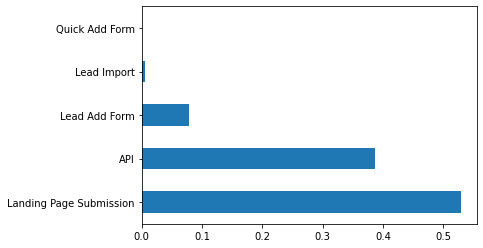

In [14]:
df['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.show()

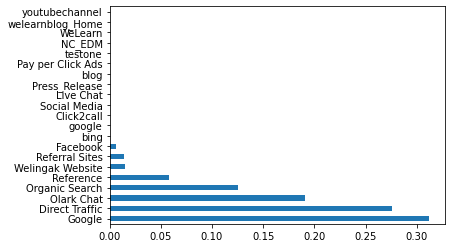

In [15]:
df['Lead Source'].value_counts(normalize=True).plot.barh()
plt.show()

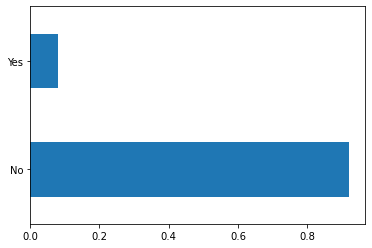

In [16]:
df['Do Not Email'].value_counts(normalize=True).plot.barh()
plt.show()

In [17]:
## 'Do Not Email' feature is very much skewed. It's better to remove this
df.drop(['Do Not Email'],axis=1,inplace=True)

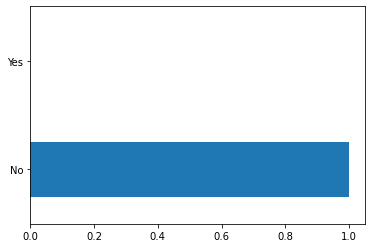

In [18]:
df['Do Not Call'].value_counts(normalize=True).plot.barh()
plt.show()

In [19]:
## 'Do Not Call' feature is very much skewed. It's better to remove this
df.drop(['Do Not Call'],axis=1,inplace=True)

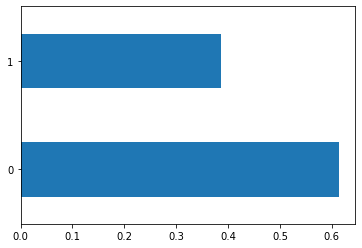

In [20]:
df['Converted'].value_counts(normalize=True).plot.barh()
plt.show()

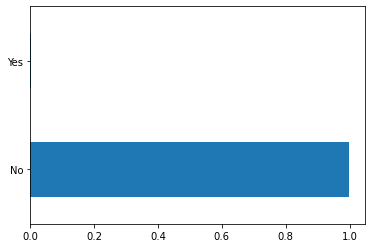

In [21]:
df['Search'].value_counts(normalize=True).plot.barh()
plt.show()

In [22]:
## 'Search' feature is very much skewed. It's better to remove this
df.drop(['Search'],axis=1,inplace=True)

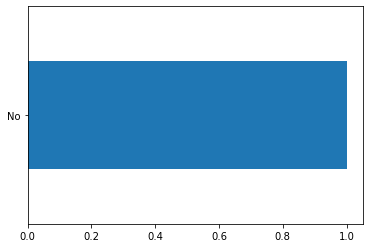

In [23]:
df['Magazine'].value_counts(normalize=True).plot.barh()
plt.show()

In [24]:
## 'Magazine' feature is very much skewed. It's better to remove this
df.drop(['Magazine'],axis=1,inplace=True)

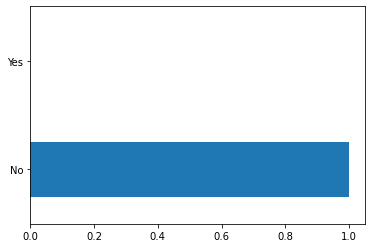

In [25]:
df['Newspaper Article'].value_counts(normalize=True).plot.barh()
plt.show()

In [26]:
## 'Newspaper Article' feature is very much skewed. It's better to remove this
df.drop(['Newspaper Article'],axis=1,inplace=True)

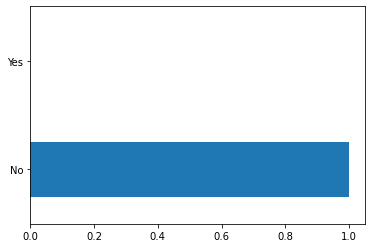

In [27]:
df['X Education Forums'].value_counts(normalize=True).plot.barh()
plt.show()

In [28]:
## 'X Education Forums' feature is very much skewed. It's better to remove this
df.drop(['X Education Forums'],axis=1,inplace=True)

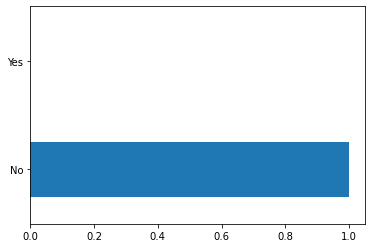

In [29]:
df['Newspaper'].value_counts(normalize=True).plot.barh()
plt.show()

In [30]:
## 'Newspaper' feature is very much skewed. It's better to remove this
df.drop(['Newspaper'],axis=1,inplace=True)

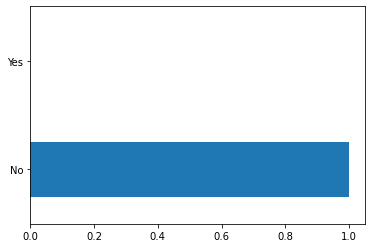

In [31]:
df['Digital Advertisement'].value_counts(normalize=True).plot.barh()
plt.show()

In [32]:
## 'Digital Advertisement' feature is very much skewed. It's better to remove this
df.drop(['Digital Advertisement'],axis=1,inplace=True)

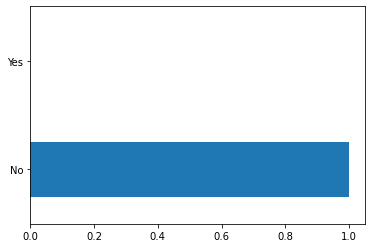

In [33]:
df['Through Recommendations'].value_counts(normalize=True).plot.barh()
plt.show()

In [34]:
## 'Through Recommendations' feature is very much skewed. It's better to remove this
df.drop(['Through Recommendations'],axis=1,inplace=True)

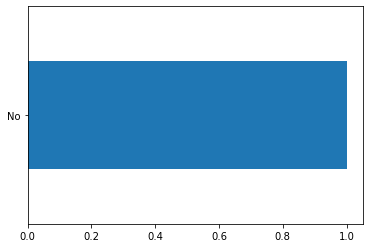

In [35]:
df['Receive More Updates About Our Courses'].value_counts(normalize=True).plot.barh()
plt.show()

In [36]:
## 'Receive More Updates About Our Courses' feature is very much skewed. It's better to remove this
df.drop(['Receive More Updates About Our Courses'],axis=1,inplace=True)

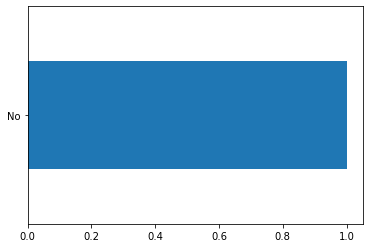

In [37]:
df['Update me on Supply Chain Content'].value_counts(normalize=True).plot.barh()
plt.show()

In [38]:
## 'Update me on Supply Chain Content' feature is very much skewed. It's better to remove this
df.drop(['Update me on Supply Chain Content'],axis=1,inplace=True)

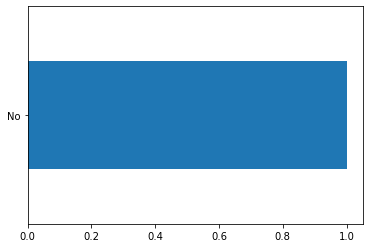

In [39]:
df['Get updates on DM Content'].value_counts(normalize=True).plot.barh()
plt.show()

In [40]:
## 'Update me on Supply Chain Content' feature is very much skewed. It's better to remove this
df.drop(['Get updates on DM Content'],axis=1,inplace=True)

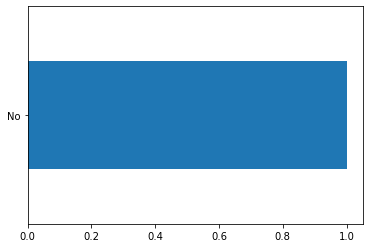

In [41]:
df['I agree to pay the amount through cheque'].value_counts(normalize=True).plot.barh()
plt.show()

In [42]:
## 'I agree to pay the amount through cheque' feature is very much skewed. It's better to remove this
df.drop(['I agree to pay the amount through cheque'],axis=1,inplace=True)

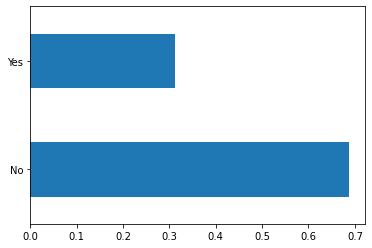

In [43]:
df['A free copy of Mastering The Interview'].value_counts(normalize=True).plot.barh()
plt.show()

In [44]:
df['Last Notable Activity'].value_counts(normalize=True) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [45]:
df['Country'].value_counts(normalize=True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Nigeria                  0.059006
Canada                   0.059006
Germany                  0.059006
South Africa             0.059006
Kuwait                   0.059006
Sweden                   0.044254
Philippines              0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
China                    0.029503
Uganda                   0.029503
Netherlands              0.029503
Italy                    0.029503
Belgium                  0.029503
Ghana                    0.029503
Indonesia                0.014751
Tanzania      

In [46]:
## 'Country' feature is very much skewed. It's better to remove this
df.drop(['Country'],axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [48]:
## identifying the categorical column with values having very low number of rows and renaming it to 'other'

In [49]:
df['Lead Source'] = df['Lead Source'].replace(["Reference", "Welingak Website",'Referral Sites','Facebook','bing','google',
                'Click2call','Live Chat','Social Media','Press_Release','youtubechannel','blog','WeLearn','Pay per Click Ads',
                 'NC_EDM','welearnblog_Home','testone'], ["Other","Other","Other","Other","Other","Other","Other","Other",
                "Other","Other","Other","Other","Other","Other","Other","Other","Other"])
df['Lead Source'].value_counts(normalize=True) * 100

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Other              9.604520
Name: Lead Source, dtype: float64

In [50]:
df['Lead Origin'] = df['Lead Origin'].replace(['Lead Import','Quick Add Form'],['Other','Other'])
df['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Other                       0.606061
Name: Lead Origin, dtype: float64

In [51]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced',
                                                'Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','View in browser link Clicked',
                                                'Approached upfront','Resubscribed to emails','Email Received','Form Submitted on Website'],["Other","Other","Other","Other","Other","Other","Other","Other",
                                                "Other","Other","Other","Other","Other"])
df['Last Notable Activity'].value_counts(normalize=True) * 100

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: Last Notable Activity, dtype: float64

In [52]:
##Missing Value Treatment

In [53]:
## percentage of rows which has atleast 3 minimum null value in a row
round(len(df[df.isnull().sum(axis=1)>1])*100/len(df), 2)

1.48

In [54]:
## rows which have more than 2 missing value are 1.48 percent
# So we can remove that
df= df[~(df.isnull().sum(axis=1)>1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

In [55]:
## now we can see the 'Lead Source' and 'Country' feature has still missing data
## lets visvalize that
df['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Other              756
Name: Lead Source, dtype: int64

In [56]:
#Lead Source 
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

In [58]:
df.nunique()

Prospect ID                               9103
Lead Number                               9103
Lead Origin                                  4
Lead Source                                  5
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
A free copy of Mastering The Interview       2
Last Notable Activity                        4
dtype: int64

In [59]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


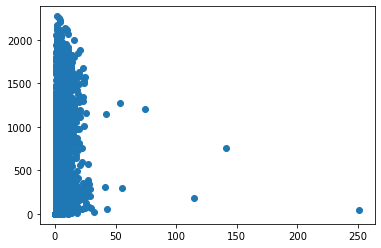

In [60]:
plt.scatter(df['TotalVisits'], df['Total Time Spent on Website'])
plt.show()

# Data preparation

In [61]:
# df['Converted'] = df['Converted'].map({0:'Converted_no',1:'Converted_yes'})
# df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'No': 'free_copy_of_mastering_interview_no','Yes':'free_copy_of_mastering_interview_yes'})

In [62]:
#Converting some binary variables (Yes/No) to 0/1
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'No': 0,'Yes':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   int64  
 10  Last Notable Activity                   9103 non-null   obje

In [63]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [64]:
##For categorical variables with multiple levels, create dummy features (one-hot encoded)
## 'Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'

In [65]:
## dummy variable for  'Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity' columns
status1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first = True)
df = pd.concat([df, status1], axis = 1)
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis = 1, inplace = True)

In [66]:
df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Checking for Outliers

In [67]:
# Checking for outliers in the continuous variables
continous_variable= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [68]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df[continous_variable].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


In [69]:
# As we can see 'Total Visits' and 'Page Views Per Visit' have outliers which needs to treated.

In [70]:
df['TotalVisits'][df['TotalVisits']>df['TotalVisits'].quantile(0.99)]= df['TotalVisits'].quantile(0.99)

In [71]:
df['Page Views Per Visit'][df['Page Views Per Visit']>df['Page Views Per Visit'].quantile(0.99)]= df['Page Views Per Visit'].quantile(0.99)

In [72]:
df[continous_variable].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.332747,481.350104,2.334002
std,3.252420,545.066142,1.985712
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


In [73]:
# 'ProspectId and Lead Number' are unique values which are reference to customer and doesn't have any impact on the end result
# So we can remove them from prospect id and we will make Leadd Number as Index
df=df.set_index('Lead Number')
df.drop([ 'Prospect ID'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 660737 to 579533
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Converted                                   9103 non-null   int64  
 1   TotalVisits                                 9103 non-null   float64
 2   Total Time Spent on Website                 9103 non-null   int64  
 3   Page Views Per Visit                        9103 non-null   float64
 4   A free copy of Mastering The Interview      9103 non-null   int64  
 5   Lead Origin_Landing Page Submission         9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                   9103 non-null   uint8  
 7   Lead Origin_Other                           9103 non-null   uint8  
 8   Lead Source_Google                          9103 non-null   uint8  
 9   Lead Source_Olark Chat                      9103 non-null   uint8  
 10  Lead 

### Test-Train Split

In [74]:
## dividing the data into test and train data

from sklearn.model_selection import train_test_split
np.random.seed(0)

In [75]:
# Putting feature variable to X
X= df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
660681,2.0,1428,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [76]:
# Putting response variable to y
y= df['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
###rescaling the feature /continious variables


In [79]:
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
588794,-0.105932,1.476324,-0.420056,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
607556,1.113025,-0.771066,2.354047,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640629,0.503547,-0.571257,0.084327,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
643916,3.246199,1.393834,0.588709,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
580141,-1.020149,-0.881052,-1.176630,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
### Checking the coversion Rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.02043282434362

###### we have 38% coversion rate

### Looking at Correlations

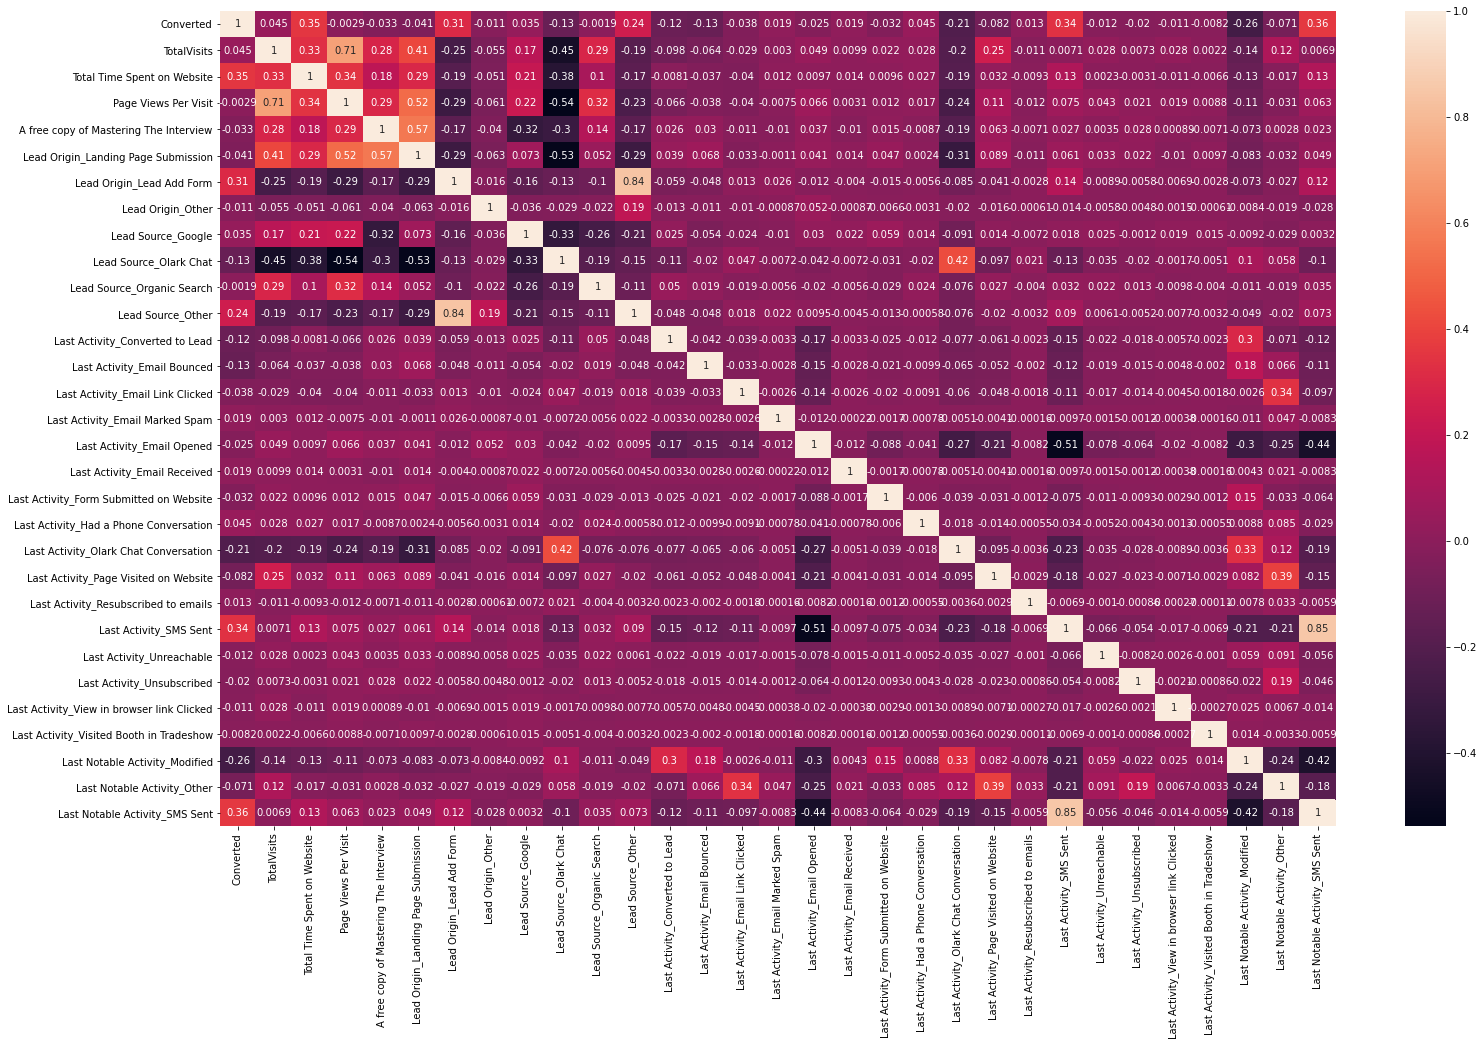

In [81]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,15))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [82]:
X_train = X_train.drop(['Page Views Per Visit','Last Notable Activity_SMS Sent', 'Lead Source_Other', 'Last Activity_SMS Sent','Lead Origin_Landing Page Submission' ], 1)
df = df.drop(['Page Views Per Visit','Last Notable Activity_SMS Sent', 'Lead Source_Other', 'Last Activity_SMS Sent','Lead Origin_Landing Page Submission' ], 1)

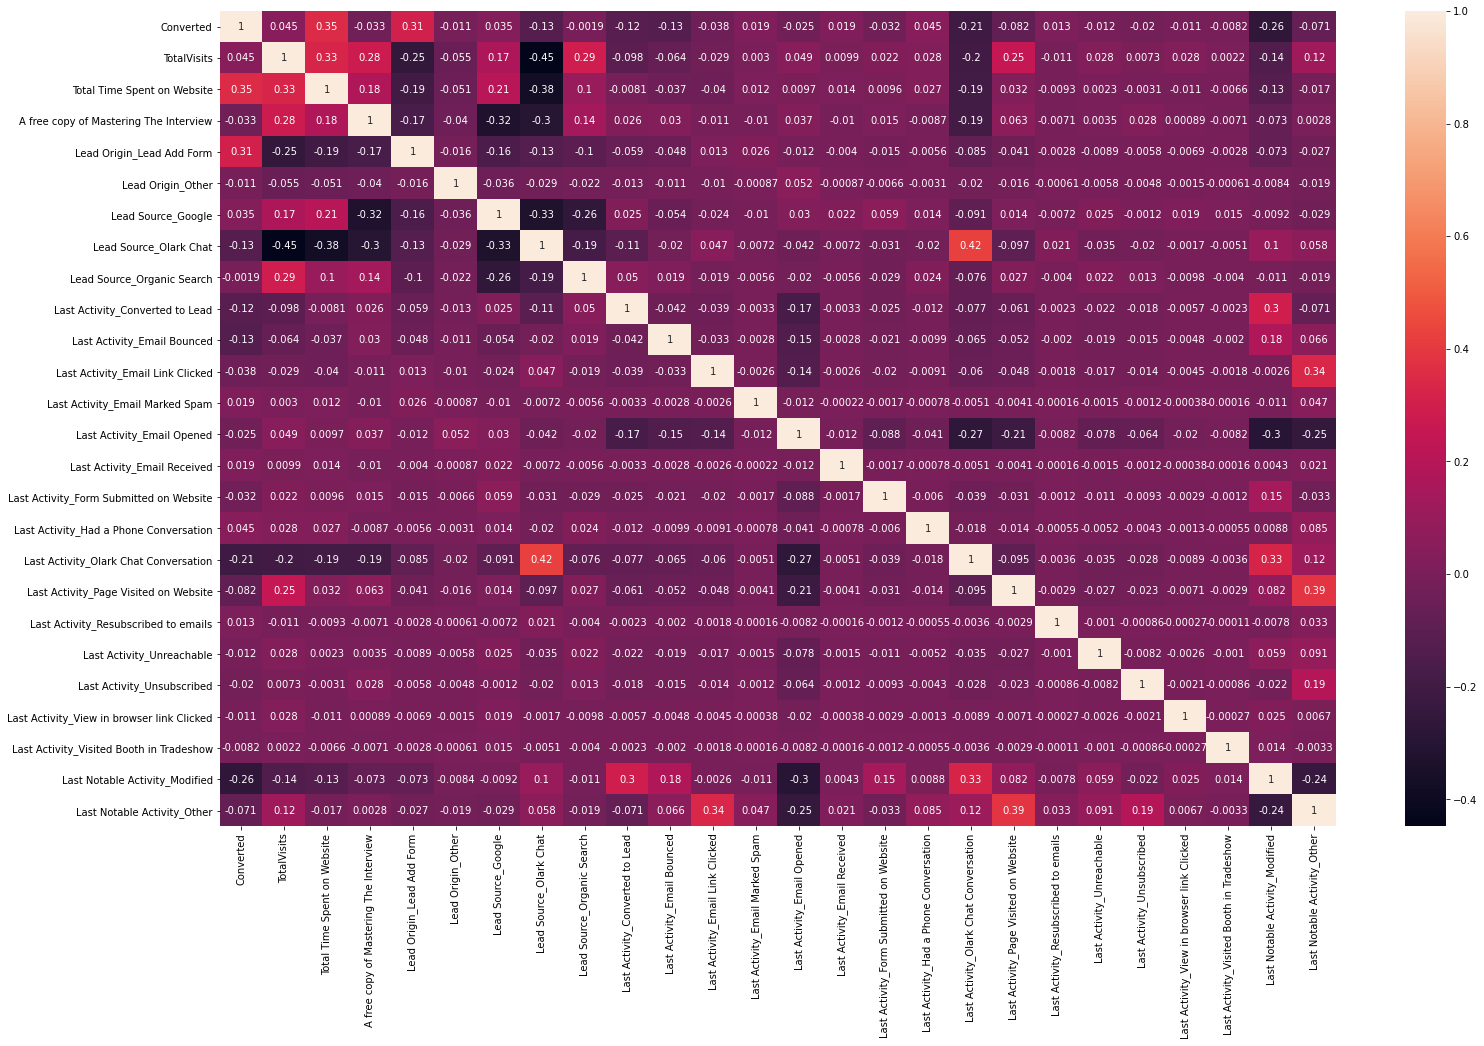

In [83]:
# After dropping the columns again check the correaltion matrix
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

## Model Building

In [84]:
import statsmodels.api as sm

In [85]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.1
Date:                Tue, 03 Aug 2021   Deviance:                       5708.2
Time:                        15:14:51   Pearson chi2:                 6.63e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0586      0.103     -0.567      0.570      -0.261       0.144
TotalVisits                                    0.1673      0.042      4.023      0.000       0.086       0.249
Total Time Spent on Website                    1.1136      0.039     28.843      0.000       1.038       1.189
A free copy of Mastering The Interview        -0.0462      0.092     -0.500      0.617      -0.227       0.135
Lead Origin_Lead Add Form                      4.7088      0.229     20.547      0.000       4.260       5.158
Lead Origin_Other                              1.6256      0.433      3.751      0.000       0.776       2.475
Lead Source_Google                             0.3037      0.102      2.981      0.003       0.104       0.503
Lead Source_Olark Chat                         1.4004      0.135     10.402      0.000       1.137       1.664
Lead Source_Organic Search                     0.0713      0.113      0.632      0.528      -0.150       0.292
Last Activity_Converted to Lead               -1.6158      0.219     -7.369      0.000      -2.046      -1.186
Last Activity_Email Bounced                   -2.5475      0.320     -7.970      0.000      -3.174      -1.921
Last Activity_Email Link Clicked              -1.4052      0.249     -5.644      0.000      -1.893      -0.917
Last Activity_Email Marked Spam               18.8268   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Email Opened                    -1.1120      0.076    -14.661      0.000      -1.261      -0.963
Last Activity_Email Received                  20.6238   2.04e+04      0.001      0.999   -3.99e+04    3.99e+04
Last Activity_Form Submitted on Website       -1.1148      0.312     -3.570      0.000      -1.727      -0.503
Last Activity_Had a Phone Conversation         0.8036      0.607      1.323      0.186      -0.387       1.994
Last Activity_Olark Chat Conversation         -2.1994      0.186    -11.814      0.000      -2.564      -1.834
Last Activity_Page Visited on Website         -1.4807      0.190     -7.787      0.000      -1.853      -1.108
Last Activity_Resubscribed to emails          21.6007   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_Unreachable                     -0.6190      0.312     -1.986      0.047      -1.230      -0.008
Last Activity_Unsubscribed                    -1.3947      0.452     -3.086      0.002      -2.281      -0.509
Last Activity_View in browser link Clicked    -1.3595      1.251     -1.086      0.277      -3.812       1.093
Last Activity_Visited Booth in Tradeshow     -20.3703   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Last Notable Activity_Modified                -0.7726      0.099     -7.792      0.000

### Feature Selection Using RFE

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([False,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False])

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Email Received', False, 3),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Resubscribed to emails', False, 4),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Last Activity_View in browser link Clicked', False, 2),

In [90]:
col = X_train.columns[rfe.support_]

In [91]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Resubscribed to emails',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Last Notable Activity_Other'],
      dtype='object')

In [92]:
# Assessing the model with StatsModels

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.1
Date:                Tue, 03 Aug 2021   Deviance:                       5746.2
Time:                        15:15:15   Pearson chi2:                 6.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0992      0.061      1.639      0.101      -0.019       0.218
Total Time Spent on Website                 1.1269      0.038     29.314      0.000       1.052       1.202
Lead Origin_Lead Add Form                   4.3687      0.210     20.814      0.000       3.957       4.780
Lead Origin_Other                           1.3052      0.423      3.084      0.002       0.476       2.135
Lead Source_Olark Chat                      1.0677      0.100     10.730      0.000       0.873       1.263
Last Activity_Converted to Lead            -1.7823      0.214     -8.339      0.000      -2.201      -1.363
Last Activity_Email Bounced                -2.7386      0.307     -8.917      0.000      -3.341      -2.137
Last Activity_Email Link Clicked           -1.5444      0.207     -7.468      0.000      -1.950      -1.139
Last Activity_Email Opened                 -1.0835      0.075    -14.426      0.000      -1.231      -0.936
Last Activity_Form Submitted on Website    -1.0988      0.310     -3.544      0.000      -1.707      -0.491
Last Activity_Had a Phone Conversation      0.7283      0.599      1.216      0.224      -0.445       1.902
Last Activity_Olark Chat Conversation      -2.2430      0.167    -13.469      0.000      -2.569      -1.917
Last Activity_Page Visited on Website      -1.4908      0.144    -10.365      0.000      -1.773      -1.209
Last Activity_Unreachable                  -0.6590      0.299     -2.206      0.027      -1.244      -0.074
Last Activity_Unsubscribed                 -1.5934      0.423     -3.768      0.000      -2.422      -0.765
Last Notable Activity_Modified             -0.7292      0.084     -8.639      0.000      -0.895      -0.564
===========================================================================================================
"""

In [94]:
## p value is very high for 'Last Activity_Had a Phone Conversation' which needs to be removed
X_train_rfe2 = X_train[col].drop(columns='Last Activity_Had a Phone Conversation')
X_train_rfe2.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Modified
Lead Number,,,,,,,,,,,,,,
588794,1.476324,0,0,0,0,0,0,0,0,0,0,0,0,0
607556,-0.771066,0,0,0,0,0,0,1,0,0,0,0,0,0
640629,-0.571257,0,0,0,0,0,0,0,0,0,0,0,0,1
643916,1.393834,0,0,0,0,0,0,1,0,0,0,0,0,0
580141,-0.881052,0,0,1,0,0,0,1,0,0,0,0,0,0


In [95]:
X_train_sm2 = sm.add_constant(X_train_rfe2)
logm3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.9
Date:                Tue, 03 Aug 2021   Deviance:                       5747.8
Time:                        15:15:24   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1052      0.060      1.742      0.081      -0.013       0.223
Total Time Spent on Website                 1.1268      0.038     29.320      0.000       1.052       1.202
Lead Origin_Lead Add Form                   4.3664      0.210     20.806      0.000       3.955       4.778
Lead Origin_Other                           1.3026      0.423      3.078      0.002       0.473       2.132
Lead Source_Olark Chat                      1.0652      0.099     10.709      0.000       0.870       1.260
Last Activity_Converted to Lead            -1.7934      0.214     -8.399      0.000      -2.212      -1.375
Last Activity_Email Bounced                -2.7475      0.307     -8.949      0.000      -3.349      -2.146
Last Activity_Email Link Clicked           -1.5508      0.207     -7.501      0.000      -1.956      -1.146
Last Activity_Email Opened                 -1.0897      0.075    -14.538      0.000      -1.237      -0.943
Last Activity_Form Submitted on Website    -1.1096      0.310     -3.580      0.000      -1.717      -0.502
Last Activity_Olark Chat Conversation      -2.2509      0.166    -13.528      0.000      -2.577      -1.925
Last Activity_Page Visited on Website      -1.4987      0.144    -10.431      0.000      -1.780      -1.217
Last Activity_Unreachable                  -0.6681      0.299     -2.238      0.025      -1.253      -0.083
Last Activity_Unsubscribed                 -1.5996      0.423     -3.783      0.000      -2.428      -0.771
Last Notable Activity_Modified             -0.7239      0.084     -8.593      0.000      -0.889      -0.559
===========================================================================================================
"""

In [96]:
#p values seems to fine now
# check VIF

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.15
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Source_Olark Chat,1.68
4,Last Activity_Converted to Lead,1.28
0,Total Time Spent on Website,1.20
7,Last Activity_Email Opened,1.20
5,Last Activity_Email Bounced,1.14
10,Last Activity_Page Visited on Website,1.11
1,Lead Origin_Lead Add Form,1.09
8,Last Activity_Form Submitted on Website,1.08


In [98]:
# VIF also seems fine

In [99]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

Lead Number
588794    0.854301
607556    0.135480
640629    0.220551
643916    0.642479
580141    0.286574
610971    0.286574
581700    0.477954
657139    0.192472
607568    0.544276
649003    0.567624
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85430115, 0.13548017, 0.22055059, 0.64247861, 0.28657433,
       0.28657433, 0.4779536 , 0.19247157, 0.54427643, 0.56762442])

In [101]:
##creating a dataframe with the actual Converted flag and the predicted probabilities

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.854301,588794
1,0,0.135480,607556
2,0,0.220551,640629
3,1,0.642479,643916
4,0,0.286574,580141


In [103]:
## Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()
len(y_train_pred_final)

6372

In [105]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3491  462]
 [ 807 1612]]


In [106]:
# Predicted        not_converted    converted
# Actual
# not_converted        3491          462
# converted            807          1612  

In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8008474576271186


In [108]:
##Metrics beyond simply accuracy

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.666391070690368

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.8831267391854288

In [112]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.11687326081457121


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.7772420443587271


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8122382503489995


In [115]:
# Plotting the ROC Curve

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

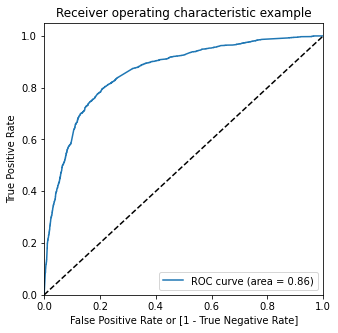

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [119]:
# Finding Optimal Cutoff Point

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(4,15)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7
0,0,0.854301,588794,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.135480,607556,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.220551,640629,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.642479,643916,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.286574,580141,0,1,1,0,0,0,0,0,0,0,0,0


In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.20  0.20  0.702291  0.909880  0.575259
0.25  0.25  0.743095  0.884663  0.656463
0.30  0.30  0.778719  0.826375  0.749557
0.35  0.35  0.792373  0.782968  0.798128
0.40  0.40  0.801632  0.743696  0.837086
0.45  0.45  0.802417  0.703183  0.863142
0.50  0.50  0.800847  0.666391  0.883127
0.55  0.55  0.782643  0.581645  0.905641
0.60  0.60  0.778249  0.545267  0.920820
0.65  0.65  0.769460  0.504754  0.931444
0.70  0.70  0.757533  0.455974  0.942069


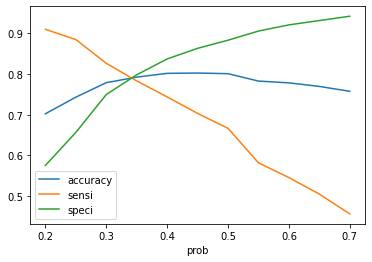

In [122]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [123]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,final_predicted
0,0,0.854301,588794,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.135480,607556,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.220551,640629,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.642479,643916,1,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.286574,580141,0,1,1,0,0,0,0,0,0,0,0,0,0


In [125]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7923728813559322

In [126]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3155,  798],
       [ 525, 1894]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7829681686647375

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.7981280040475588

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20187199595244118


In [131]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7035661218424963


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8573369565217391


In [133]:
##we can say that 0.35 probaliblity is the optimum but if CEO has given target lead conversion rate to be around 80%.
## for that 0.5 probability should be appropriate as the Positive predictive value tunrout to be 77.7% which is near to that

### Making predictions on the test set

In [134]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [135]:
X_test = X_test.drop(['Page Views Per Visit','Last Notable Activity_SMS Sent', 'Lead Source_Other', 'Last Activity_SMS Sent','Lead Origin_Landing Page Submission' ], 1)

In [136]:
X_test = X_test[col].drop(columns='Last Activity_Had a Phone Conversation')
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Modified
Lead Number,,,,,,,,,,,,,,
626930,-0.103815,0,0,0,0,0,0,1,0,0,0,0,0,0
621198,-0.881052,1,0,0,0,0,0,0,0,0,0,0,0,0
594161,0.424120,0,0,0,0,0,0,0,0,0,0,0,0,0
647285,-0.105648,0,0,0,0,0,0,1,0,0,0,0,0,0
587146,-0.428274,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
X_test_sm = sm.add_constant(X_test)

In [138]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
y_pred_1.head()

,0
Lead Number,
626930,0.249465
621198,0.970077
594161,0.641776
647285,0.249079
587146,0.132833


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,626930,0.249465
1,1,621198,0.970077
2,0,594161,0.641776
3,0,647285,0.249079
4,1,587146,0.132833


In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [148]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,626930,0.249465
1,1,621198,0.970077
2,0,594161,0.641776
3,0,647285,0.249079
4,1,587146,0.132833


In [149]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [150]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,626930,0.249465,0
1,1,621198,0.970077,1
2,0,594161,0.641776,1
3,0,647285,0.249079,0
4,1,587146,0.132833,0


In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7986085682900037

In [152]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1419,  270],
       [ 280,  762]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7312859884836852

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.8401420959147424

In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7383720930232558


In [157]:
y_pred_final['Score'] = y_pred_final.Converted_Prob*100

In [158]:
y_pred_final

,Converted,Lead Number,Converted_Prob,final_predicted,Score
0,0,626930,0.249465,0,24.946525
1,1,621198,0.970077,1,97.007728
2,0,594161,0.641776,1,64.177602
3,0,647285,0.249079,0,24.907870
4,1,587146,0.132833,0,13.283277
...,...,...,...,...,...
2726,0,599958,0.324147,0,32.414684
2727,0,657077,0.082063,0,8.206319
2728,0,624090,0.146224,0,14.622419
2729,1,588144,0.919631,1,91.963144
